### 参考  
- 理論  
http://cogpsy.educ.kyoto-u.ac.jp/personal/Kusumi/datasem11/osanai.pdf    
- 実装  
https://www.juen.ac.jp/lab/okumura/handout/160201R%E3%81%AB%E3%82%88%E3%82%8B%E5%9B%A0%E5%AD%90%E5%88%86%E6%9E%90.pages.pdf  

In [1]:
install.packages("rworldmap")
library(rworldmap)


The downloaded binary packages are in
	/var/folders/jb/jxztdls55vncm84hp50zf9n40000gn/T//RtmpKipRIS/downloaded_packages


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [2]:
library(openxlsx)
library(corrplot)

corrplot 0.84 loaded



In [3]:
df <- read.xlsx("../data/data_covid_fix_name.xlsx")

In [4]:
df <- df[, colnames(df) != "cumul"]

In [5]:
df <- na.omit(df)
# index reset
rownames(df) <- 1:nrow(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,1516.63
5,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,75667.65
6,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,12935.50


In [49]:
data = df[,c(2,3,4,5,6,9,10,12)]

# log
data = log(data)
# 標準化
data= scale(data)

head(data)

,pop,urb,gdp,dist,hf,date_first,detection,air
1,-0.8304081,0.14522960,0.00803967,-0.10000665,0.83937737,0.40068236,0.9784892,-0.7001144
2,0.8179593,0.55943437,0.13185308,0.37723785,-1.86965358,-0.09390578,-2.1891023,0.4308812
3,0.6247775,0.32948958,-0.60487411,0.63280474,-1.39618757,0.84870044,-1.4943360,-1.2074928
4,0.8499898,1.08357748,0.37271488,1.70998847,0.03871705,0.20577415,0.9924628,-0.1043414
5,0.4965495,0.93662818,1.14624886,0.05180777,1.40807981,-2.20412299,1.4470387,1.3424378
6,-0.1398002,0.06918419,1.20586029,-0.07254229,1.30989675,-0.09390578,0.9525753,0.6888197


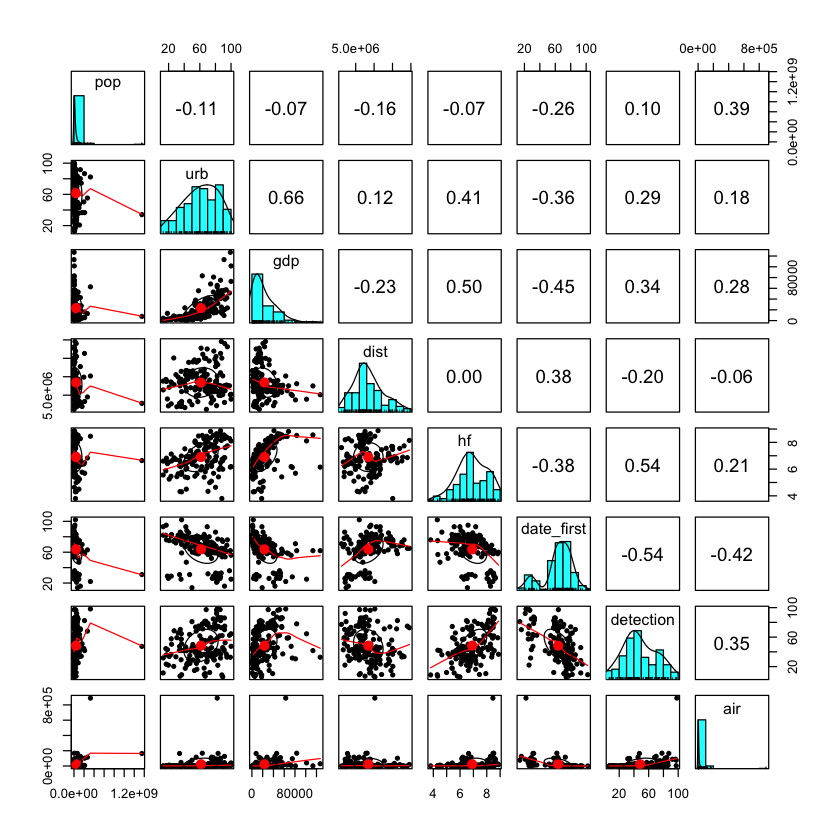

In [48]:
# logなしの分布
library(psych)
psych::pairs.panels(df[,c(2,3,4,5,6,9,10,12)])

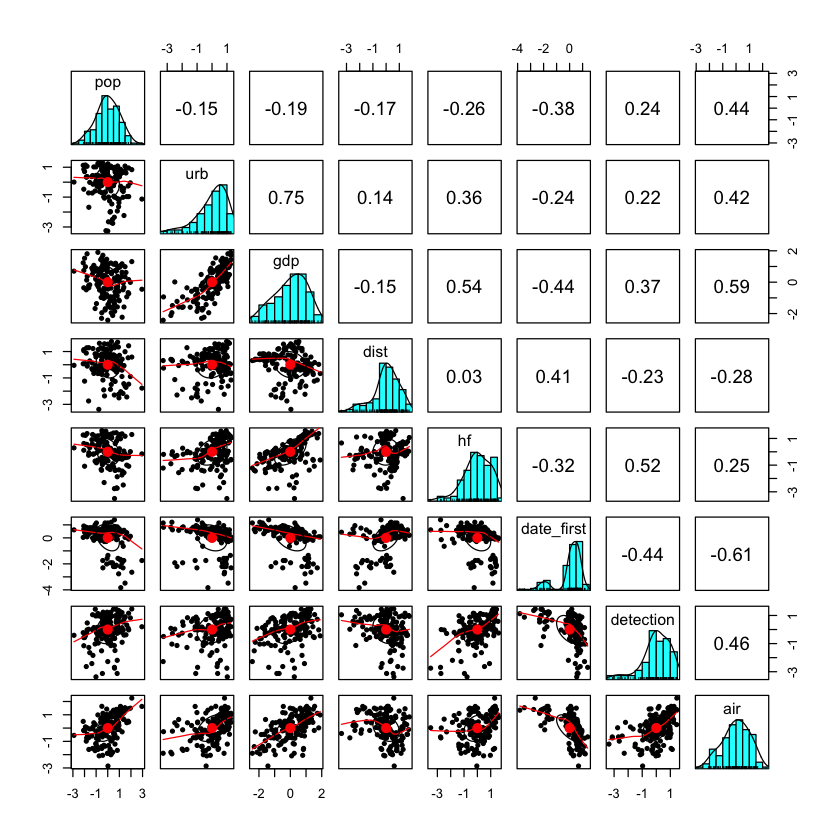

In [50]:
# 全部logをとった分布
psych::pairs.panels(data)

In [46]:
# 相関行列
cor_matrix = cor(data)
round(cor_matrix, 2)

,pop,urb,gdp,dist,hf,date_first,detection,air
pop,1.00,-0.11,-0.07,-0.16,-0.07,-0.26,0.10,0.39
urb,-0.11,1.00,0.66,0.12,0.41,-0.36,0.29,0.18
gdp,-0.07,0.66,1.00,-0.23,0.50,-0.45,0.34,0.28
dist,-0.16,0.12,-0.23,1.00,0.00,0.38,-0.20,-0.06
hf,-0.07,0.41,0.50,0.00,1.00,-0.38,0.54,0.21
date_first,-0.26,-0.36,-0.45,0.38,-0.38,1.00,-0.54,-0.42
detection,0.10,0.29,0.34,-0.20,0.54,-0.54,1.00,0.35
air,0.39,0.18,0.28,-0.06,0.21,-0.42,0.35,1.00


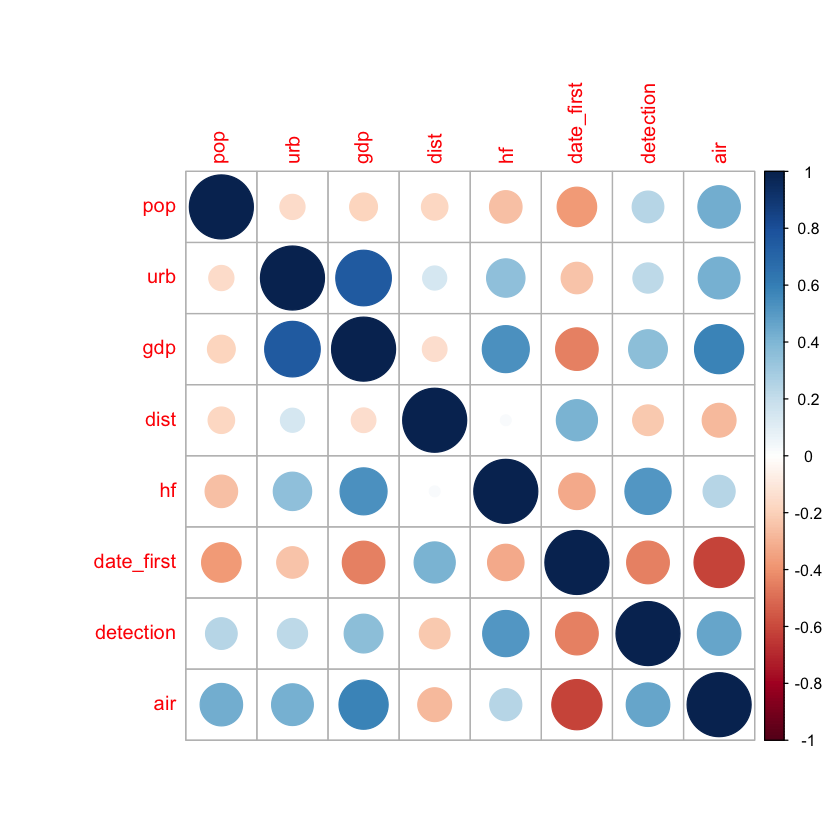

In [8]:
# urb - gdp (0.75)
# detection - hf (0.52)
# air - date_first (-0.61)
corrplot(cor_matrix)

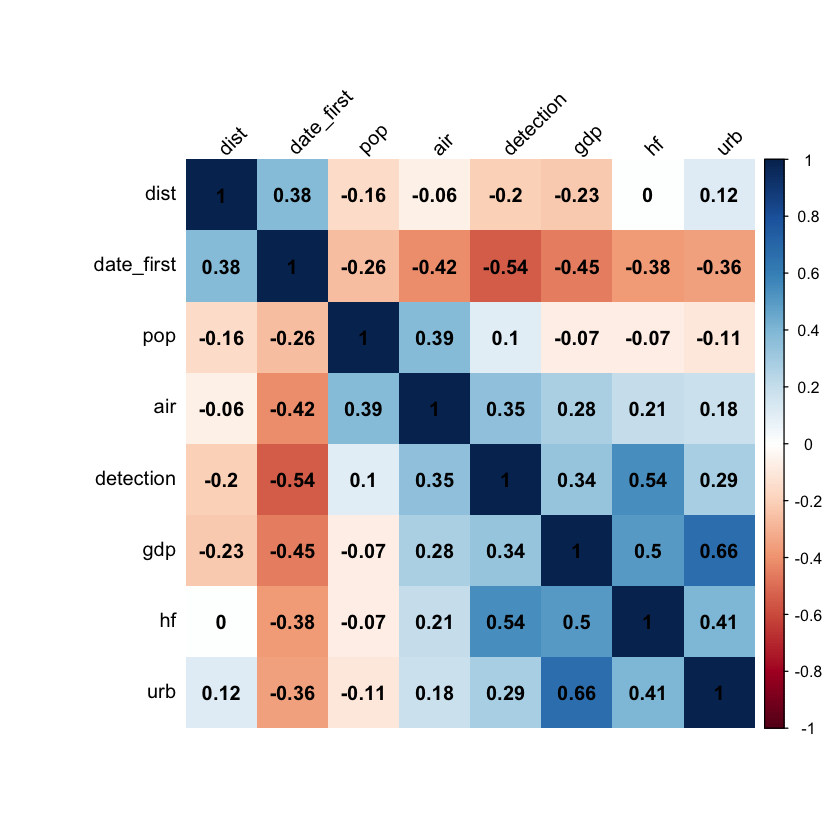

In [47]:
corrplot(cor_matrix, method="shade", shade.col=NA, tl.col="black", tl.srt=45,, addCoef.col="black", addcolorlabel="no", order="AOE")

In [10]:
# 固有値
eigenvalue　= eigen(cor_matrix)$values
print(eigenvalue)

[1] 3.2940895 1.8139078 0.9550529 0.8506228 0.4465154 0.2992735 0.2103101
[8] 0.1302280


In [11]:
# 固有ベクトル
eigenvector　= eigen(cor_matrix)$vectors
eigenvector

-0.1101945,0.6021132,0.37923281,0.33290730,0.01672323,-0.03692528,-0.52614993,0.30363663
-0.3457896,-0.3890415,0.44260838,-0.15011569,0.20900561,-0.46377227,-0.32851405,-0.37940713
-0.4510701,-0.3017049,0.10691483,-0.28538511,0.06413042,0.13021587,0.08004694,0.76495625
0.1786327,-0.3906701,0.48211330,0.63503899,-0.26090395,0.02074917,0.31625210,0.10603141
-0.3388959,-0.3337128,-0.44309998,0.35230334,-0.32181234,0.29466419,-0.50109385,-0.10883428
0.4146963,-0.2794451,0.04856175,0.08118728,0.69186572,0.41580075,-0.29301114,0.05969747
-0.3819424,0.1044106,-0.33972915,0.49939228,0.54213713,-0.28663592,0.31929542,0.01968484
-0.4474476,0.2051878,0.31985083,-0.04262807,0.08774613,0.65137370,0.26442717,-0.38943306


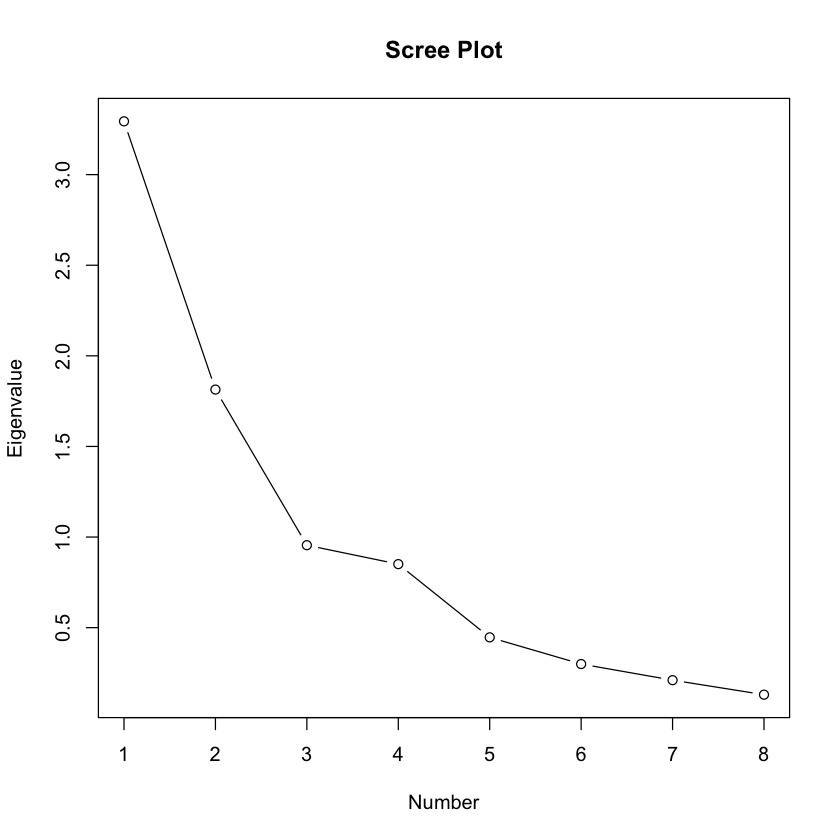

In [12]:
# スクリープロット
# 固有値の1以上の数を観察(この場合2)
# 固有値の1以上の数が共通因子の数に関係する
plot(eigenvalue, type="b", main="Scree Plot", xlab="Number", ylab="Eigenvalue")

# 因子分析  

In [40]:
# 因子の回転法を“varimax”もしくは“promax”から選択する。回転させない場合は“none”と指定。
# factor：共通因子の数を指定する。
# scores:回帰方法 (regression) とバートレット法 (Bartlett) 
fit0<- factanal(x=data, factors=3, rotation="none",scores="Bartlett")
fit1<- factanal(x=data, factors=3, rotation="varimax",scores="Bartlett")
fit2<- factanal(x=data, factors=3, rotation="promax",scores="Bartlett")

#### 結果の読み取り  
- loadings　因子負荷量    
- correlation　相関係数    
- factors　求めた因子数    
- STATISTIC　カイ2乗値    
- dof　カイ2乗決定の自由度    
- PVAL　カイ2乗統計量のP値(元のデータの分散と指定した共通因子のモデルに基づいて求めたデータの分散との間の有意差に関する検定統計量である。この検定統計量は、探索的に因子分析を行う際の因子の数を決める際の1つの参考材料となる)       

### 回転なし

In [41]:
# cutoff=0 は（値の小さいものも含め）全ての因子負荷の値を表示させる指示
# Uniquenesses：独自性 (=1-共通性) 
# 因子の回転によって因子負荷と寄与の値は変化するが、独自性の値は変化しない（ということは共通性の値も変化しない）
# 共通性の値が1以上，あるいは0に近い値でないか注意
# 

# 因子負荷量は相関係数なので0から±1の値をとる
print(fit0, cutoff=0)


Call:
factanal(x = data, factors = 3, scores = "Bartlett", rotation = "none")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.257      0.423      0.005      0.861      0.005      0.446      0.513 
       air 
     0.239 

Loadings:
           Factor1 Factor2 Factor3
pop        -0.249   0.821   0.085 
urb         0.636  -0.077   0.408 
gdp         0.878  -0.011   0.473 
dist       -0.071  -0.316  -0.184 
hf          0.873   0.003  -0.483 
date_first -0.439  -0.587  -0.129 
detection   0.507   0.454  -0.157 
air         0.484   0.629   0.361 

               Factor1 Factor2 Factor3
SS loadings      2.689   1.726   0.836
Proportion Var   0.336   0.216   0.105
Cumulative Var   0.336   0.552   0.656

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 46.05 on 7 degrees of freedom.
The p-value is 8.55e-08 


In [42]:
tmp = promax(fit0$loadings)$rotmat
solve(t(tmp)  %*% tmp)

1.0000000,0.3307958,0.5642382
0.3307958,1.0000000,0.3510472
0.5642382,0.3510472,1.0000000


### varimax(直行回転)  

In [43]:
# 因子間の相関を仮定しない
# distとhf、detectionに関しては独自因子が0.5を超えているので、これらの変数は共通因子で説明できない情報が半分を超えていると言える。
print(fit1, cutoff=0)


Call:
factanal(x = data, factors = 3, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.257      0.423      0.005      0.861      0.005      0.446      0.513 
       air 
     0.239 

Loadings:
           Factor1 Factor2 Factor3
pop        -0.320   0.798  -0.067 
urb         0.740   0.076   0.156 
gdp         0.938   0.167   0.296 
dist       -0.095  -0.360   0.011 
hf          0.298  -0.123   0.944 
date_first -0.253  -0.611  -0.341 
detection   0.144   0.396   0.556 
air         0.428   0.726   0.224 

               Factor1 Factor2 Factor3
SS loadings      1.895   1.872   1.484
Proportion Var   0.237   0.234   0.186
Cumulative Var   0.237   0.471   0.656

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 46.05 on 7 degrees of freedom.
The p-value is 8.55e-08 


In [17]:
tmp = promax(fit1$loadings)$rotmat
solve(t(tmp)  %*% tmp)

1.0000000,0.2854632
0.2854632,1.0000000


### promax(斜交回転)  

In [18]:
# 因子間の相関を仮定
# but, 相関はなかった
print(fit2, cutoff=0)


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "promax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.487   0.843 
urb         0.759  -0.008 
gdp         0.974   0.074 
dist       -0.023  -0.350 
hf          0.556  -0.039 
date_first -0.220  -0.630 
detection   0.216   0.434 
air         0.336   0.722 

               Factor1 Factor2
SS loadings      2.279   1.947
Proportion Var   0.285   0.243
Cumulative Var   0.285   0.528

Factor Correlations:
        Factor1 Factor2
Factor1   1.000  -0.285
Factor2  -0.285   1.000

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 


In [19]:
tmp = promax(fit2$loadings)$rotmat
solve(t(tmp)  %*% tmp)

1.0000000,0.1648625
0.1648625,1.0000000


## 結果の解釈  
- fit2では因子間の相関を仮定してpromax(斜交回転)で因子分析をした。  
しかし、相関は得られなかった。(相関係数-0.285)  
よって相関をないと仮定する  
- fi1では因子間の相関はないと仮定してvarimax(直行回転)で因子分析をした。  
結果、因子間相関はなかった。(相関係数0.285)  

In [20]:
unclass(fit1$loadings)　

,Factor1,Factor2
pop,-0.4020358,0.74297671
urb,0.7430598,0.14301895
gdp,0.9608995,0.26771818
dist,-0.0534007,-0.35297926
hf,0.5413911,0.07163641
date_first,-0.2719973,-0.67102067
detection,0.2500562,0.47489143
air,0.3939073,0.78635833


### 因子負荷量の可視化  
- factor1・・・gdp, urb, hfが影響(先進国)  
- factor2・・・pop, air, data_firstが影響()  

In [21]:
options(warn=-1)

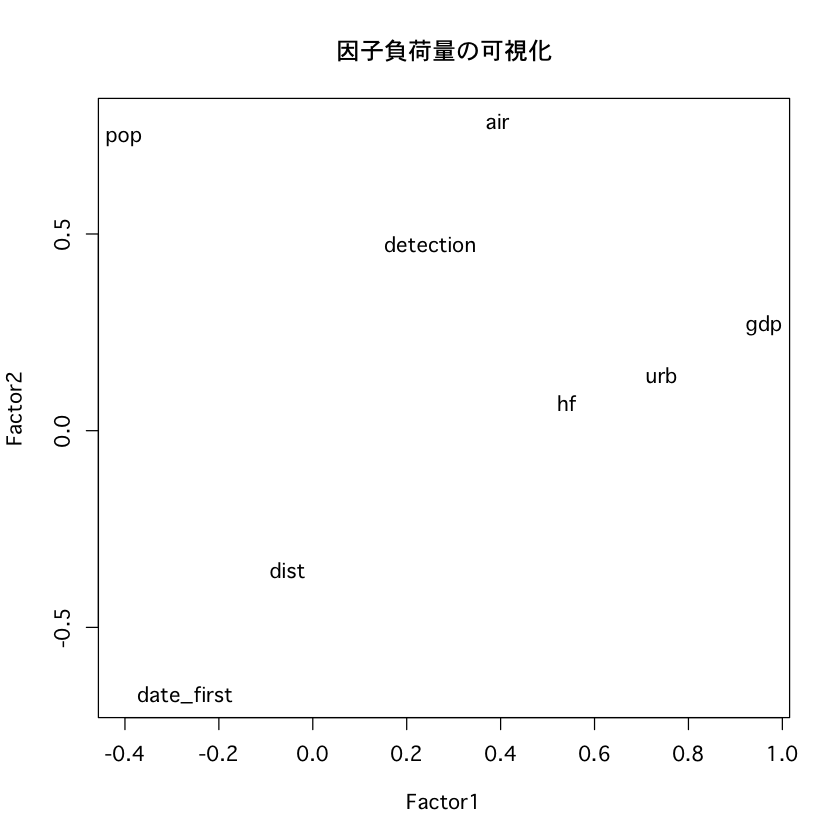

In [22]:
# 因子負荷量の散布図(値は相関係数)
par(family="Osaka")
plot(fit1$loadings[,1:2],type="n", main="因子負荷量の可視化")
text(fit1$loadings[,1:2],colnames(data))

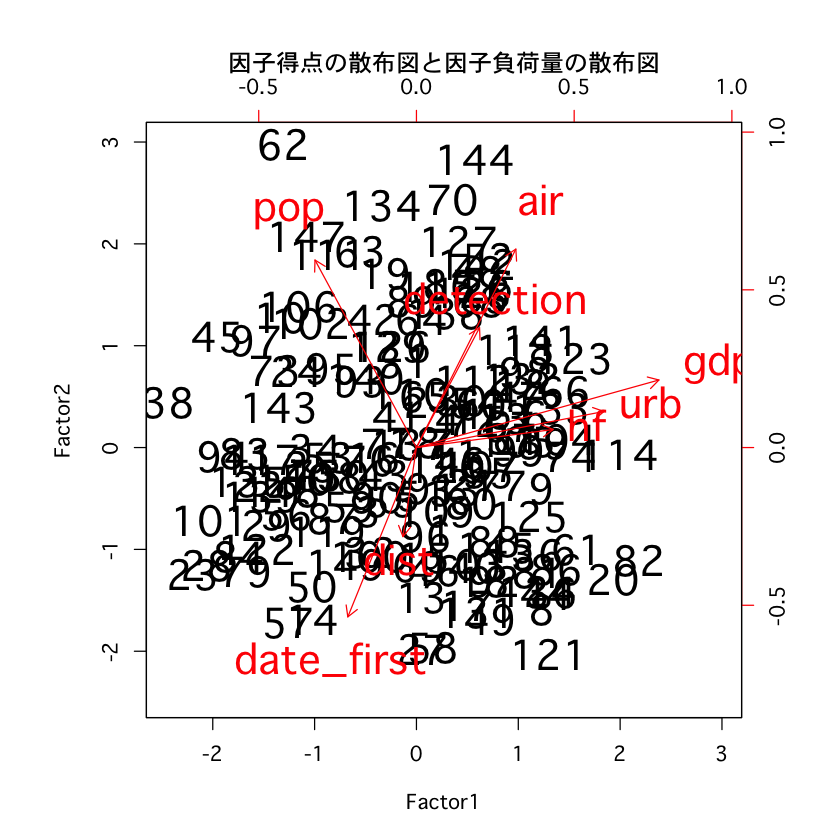

In [23]:
# 因子得点の散布図と因子負荷量の散布図
par(family="Osaka")
biplot(fit1$scores,fit1$loading,cex=2, main="因子得点の散布図と因子負荷量の散布図")

In [24]:
# factor2（第二共通因子）までの累積寄与率は、0.537(0.5を超えておけばok?)
fit1


Call:
factanal(x = data, factors = 2, scores = "Bartlett", rotation = "varimax")

Uniquenesses:
       pop        urb        gdp       dist         hf date_first  detection 
     0.286      0.427      0.005      0.873      0.702      0.476      0.712 
       air 
     0.226 

Loadings:
           Factor1 Factor2
pop        -0.402   0.743 
urb         0.743   0.143 
gdp         0.961   0.268 
dist               -0.353 
hf          0.541         
date_first -0.272  -0.671 
detection   0.250   0.475 
air         0.394   0.786 

               Factor1 Factor2
SS loadings      2.225   2.068
Proportion Var   0.278   0.259
Cumulative Var   0.278   0.537

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 104.92 on 13 degrees of freedom.
The p-value is 1.83e-16 

In [25]:
score_df = as.data.frame(fit1$score)
head(score_df)

,Factor1,Factor2
,<dbl>,<dbl>
1,0.239466982,-0.8067330
2,0.001249695,0.4462947
3,-0.466127050,-0.6306339
4,0.306802239,0.2783279
5,0.792748876,1.4713779
6,1.161208313,0.3134312


### 因子得点の高い国の確認

In [26]:
# 方法1

In [27]:
# Factor1の因子スコアが多い国の確認

#tmp = subset(score_df, (Factor1 >1.5) | (Factor1 < -1.5))
tmp = subset(score_df, Factor1 >1.5)
index_f1 = as.integer(rownames(tmp))

df[index_f1,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,Brunei,428962,77.629,80920.05,3719566,5.69,4.760902,6.62,71,30.5,1,1234.45
61,Iceland,353574,93.813,57303.06,7695516,8.41,9.084634,7.74,61,37.2,1,7819.74
74,Kuwait,4137309,100.000,72897.56,5244993,6.19,5.968881,6.41,56,47.5,1,6464.85
82,Luxembourg,607728,90.981,113337.42,7510071,8.56,9.263800,7.86,62,41.7,1,2099.10
114,Qatar,2781677,99.135,126898.43,5117748,6.15,5.238267,7.07,62,32.7,1,29178.92
123,Singapore,5638676,100.000,101531.63,3897578,8.11,7.502452,8.71,25,64.5,1,40401.51


In [28]:
# Factor2の因子スコアが多い国の確認
tmp = subset(score_df, Factor2 >1.5)
index_f2 = as.integer(rownames(tmp))

df[index_f2,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,Brazil,209469333,86.569,16096.401,16335606,6.48,6.739923,6.23,58,82.4,1,102109.98
26,Canada,37058856,81.411,48130.256,8965622,8.65,9.222964,8.08,27,96.4,1,89380.00
48,France,66987244,80.444,45342.396,8550121,8.02,8.693716,7.35,26,75.3,1,70188.03
52,Germany,82927922,77.312,53074.540,7170071,8.53,9.247491,7.82,29,84.6,1,109796.20
62,India,1352617328,34.030,7762.882,2777278,6.64,6.368844,6.91,31,47.4,1,164035.64
63,Indonesia,267663435,55.325,13079.619,4514121,6.83,6.384634,7.27,63,68.1,1,115154.10
70,Japan,126529100,91.616,42797.459,3024190,8.28,8.699179,7.86,16,70.1,1,126387.53
85,Malaysia,31528585,76.036,31782.153,3678054,6.52,5.698542,7.34,26,73.2,1,60481.77
111,Philippines,106651922,46.907,8951.086,3345565,6.88,6.442997,7.32,31,63.6,1,43080.12


In [29]:
# 方法2
df_factor_score = df
df_factor_score["factor1_score"] = score_df$Factor1
df_factor_score["factor2_score"] = score_df$Factor2

In [30]:
df_score1 = df_factor_score[order(df_factor_score$factor1_score, decreasing=T),]
df_score1[0:10,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air,factor1_score,factor2_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82,Luxembourg,607728,90.981,113337.42,7510071,8.56,9.263800,7.86,62,41.7,1,2099.10,2.186788,-1.10327065
114,Qatar,2781677,99.135,126898.43,5117748,6.15,5.238267,7.07,62,32.7,1,29178.92,1.989676,-0.07009626
20,Brunei,428962,77.629,80920.05,3719566,5.69,4.760902,6.62,71,30.5,1,1234.45,1.933759,-1.28993465
61,Iceland,353574,93.813,57303.06,7695516,8.41,9.084634,7.74,61,37.2,1,7819.74,1.578595,-1.00386176
123,Singapore,5638676,100.000,101531.63,3897578,8.11,7.502452,8.71,25,64.5,1,40401.51,1.548142,0.87195333
74,Kuwait,4137309,100.000,72897.56,5244993,6.19,5.968881,6.41,56,47.5,1,6464.85,1.513236,-0.08974272
66,Ireland,4853506,63.170,83203.39,8108624,8.52,8.904377,8.13,62,78.0,1,167598.63,1.457428,0.54903153
104,Norway,5314336,82.248,65510.59,6208684,8.44,9.259625,7.62,59,58.6,1,12277.22,1.378496,0.07995226
86,Malta,483530,94.612,42581.10,7705714,8.37,8.770593,7.97,69,32.9,1,2576.90,1.370505,-1.19713148


In [31]:
df_score2 = df_factor_score[order(df_factor_score$factor2_score, decreasing=T),]
df_score2[0:10,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air,factor1_score,factor2_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
62,India,1352617328,34.030,7762.882,2777278,6.64,6.368844,6.91,31,47.4,1,164035.64,-1.3053998,2.976276
144,USA,327167434,82.256,62794.586,10196715,8.46,8.720049,8.19,22,98.2,1,889022.00,0.5756215,2.833076
70,Japan,126529100,91.616,42797.459,3024190,8.28,8.699179,7.86,16,70.1,1,126387.53,0.3576022,2.438521
134,Thailand,69428524,49.949,19051.333,2392656,6.55,6.247297,6.86,14,81.0,1,76053.04,-0.3385346,2.380117
147,Vietnam,95540395,35.919,7447.814,2220676,6.29,6.310973,6.27,25,57.4,1,47049.67,-1.0777390,2.072711
127,South Korea,51635256,81.459,40111.776,2146566,8.20,8.814165,7.59,21,92.1,1,88157.88,0.4169459,2.024494
63,Indonesia,267663435,55.325,13079.619,4514121,6.83,6.384634,7.27,63,68.1,1,115154.10,-0.5492507,1.924415
111,Philippines,106651922,46.907,8951.086,3345565,6.88,6.442997,7.32,31,63.6,1,43080.12,-0.8654619,1.898987
52,Germany,82927922,77.312,53074.540,7170071,8.53,9.247491,7.82,29,84.6,1,109796.20,0.7003818,1.855330


# 可視化(各変数の大小の確認)

In [32]:
library(classInt)

In [33]:
library(classInt)
#b5 n等分する、style=によって分け方変わるので注意
b5<-classIntervals(as.integer(df$air),n=5)

#c5はb5で分けした数(length(b5$brks)の色を用意
c5<-rev(heat.colors(length(b5$brks)-1))
#b.colで区分の色を決める
b.col<-findColours(b5,c5)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


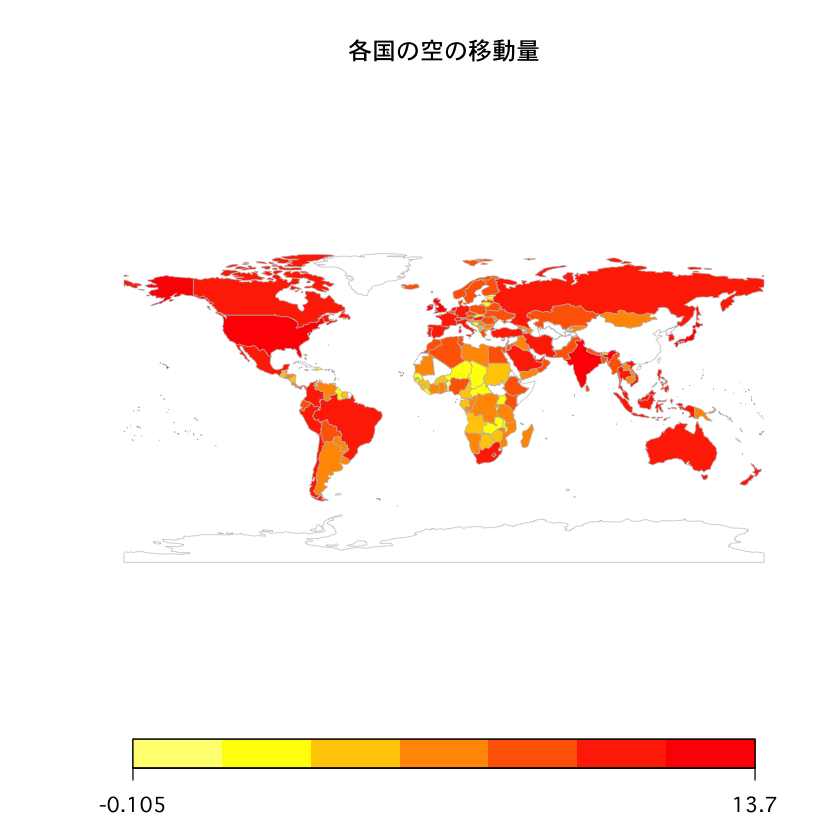

In [34]:
tmp = df
tmp["air"] = log(tmp["air"])

map_obj <- joinCountryData2Map(tmp, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="air"
               , catMethod="fixedWidth"
               , mapTitle = "各国の空の移動量"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


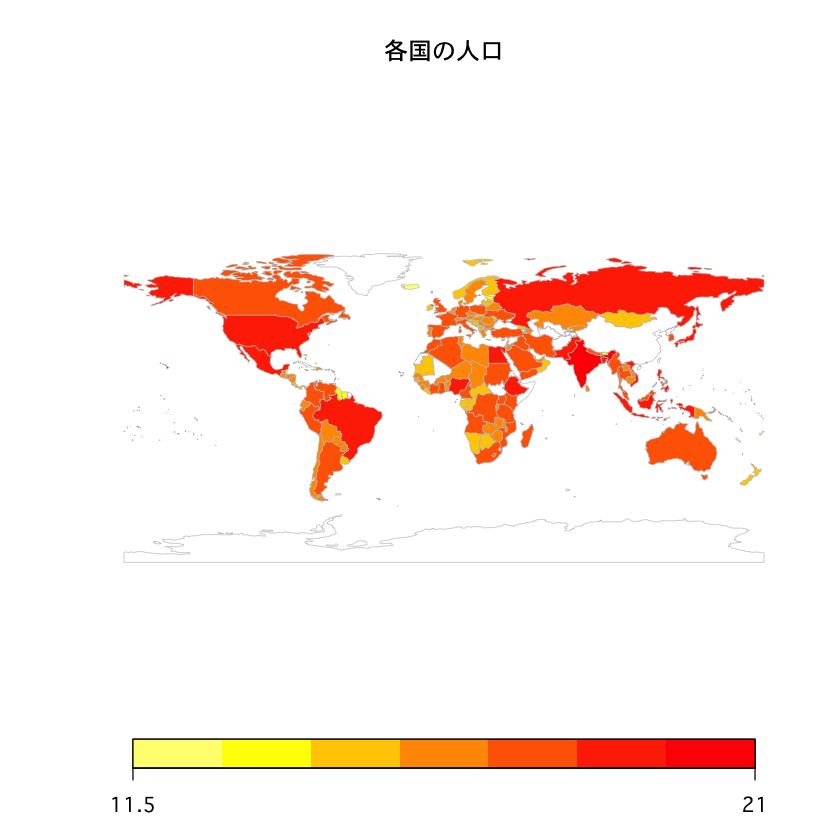

In [35]:
tmp = df
tmp["pop"] = log(tmp["pop"])

map_obj <- joinCountryData2Map(tmp, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="pop"
               , catMethod="fixedWidth"
               , mapTitle = "各国の人口"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


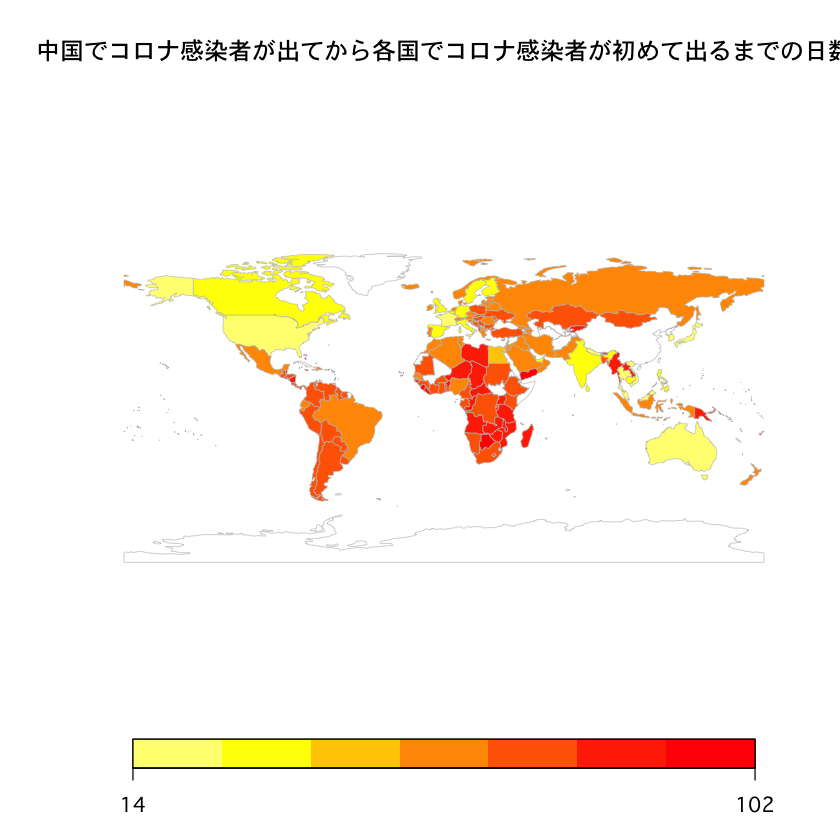

In [36]:
map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="date_first"
               , catMethod="fixedWidth"
               , mapTitle = "中国でコロナ感染者が出てから各国でコロナ感染者が初めて出るまでの日数"
               , colourPalette=rev(heat.colors(7))
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


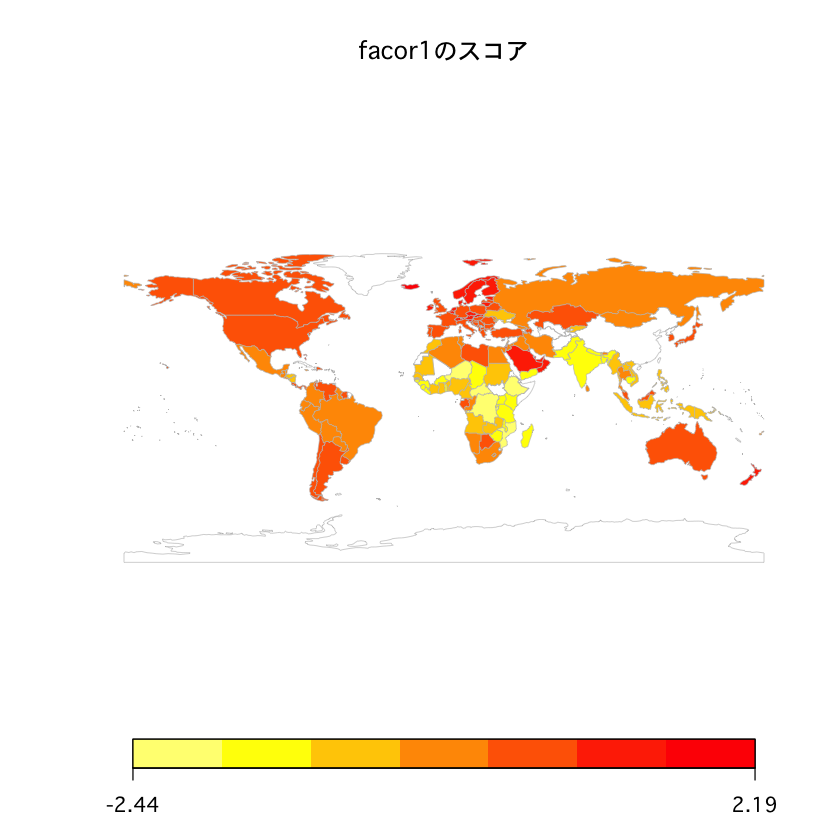

In [37]:
map_obj <- joinCountryData2Map(df_score1, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="factor1_score"
               , catMethod="fixedWidth"
               , mapTitle = "facor1のスコア"
               , colourPalette=rev(heat.colors(7))
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


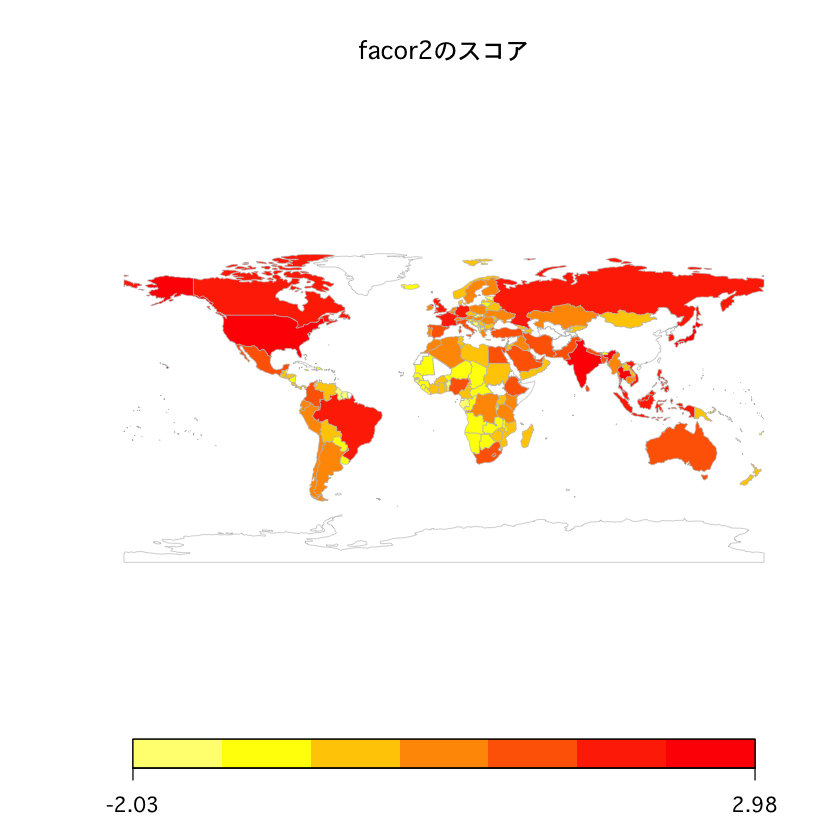

In [38]:
map_obj <- joinCountryData2Map(df_score2, joinCode="NAME", nameJoinColumn="country")
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="factor2_score"
               , catMethod="fixedWidth"
               , mapTitle = "facor2のスコア"
               , colourPalette=rev(heat.colors(7))
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               #,colourPalette=b.col
               , addLegend = TRUE)

In [39]:
df[order(df$urb, decreasing=T),]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74,Kuwait,4137309,100.000,72897.562,5244993,6.19,5.968881,6.41,56,47.5,1,6464.85
123,Singapore,5638676,100.000,101531.630,3897578,8.11,7.502452,8.71,25,64.5,1,40401.51
114,Qatar,2781677,99.135,126898.426,5117748,6.15,5.238267,7.07,62,32.7,1,29178.92
12,Belgium,11422068,98.001,51407.998,7548354,8.29,9.067695,7.51,36,62.5,1,13639.49
145,Uruguay,3449299,95.334,23572.177,18135344,7.74,8.420754,7.05,76,33.5,1,563.63
86,Malta,483530,94.612,42581.098,7705714,8.37,8.770593,7.97,69,32.9,1,2576.90
61,Iceland,353574,93.813,57303.061,7695516,8.41,9.084634,7.74,61,37.2,1,7819.74
67,Israel,8883800,92.418,39919.170,6247521,7.61,7.695323,7.53,54,52.4,1,7404.37
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,1516.63


In [55]:
tmp = df[order(df$date_first),]
tmp[40:60,]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103,Macedonia,2082958,57.963,16358.662,6851849,7.34,7.662440,7.02,59,41.7,1,86.87
104,Norway,5314336,82.248,65510.585,6208684,8.44,9.259625,7.62,59,58.6,1,12277.22
106,Pakistan,212215030,36.666,5567.056,3277290,5.69,5.471811,5.91,59,41.7,1,6880.64
115,Romania,19473936,53.998,28206.357,6422259,8.11,8.536526,7.68,59,42.8,1,4908.23
11,Belarus,9485386,78.595,19994.804,5952246,6.65,6.659028,6.64,60,28.9,1,2760.17
44,Estonia,1320884,68.880,35973.776,5972791,8.46,9.021806,7.89,60,77.6,1,31.98
81,Lithuania,2789533,67.679,35461.359,6160471,8.32,8.757218,7.88,60,81.5,1,26.03
98,Netherlands,17231017,91.490,56328.941,7432851,8.50,9.283201,7.72,60,86.0,1,43996.04
99,New Zealand,4885500,86.538,41005.421,11071536,8.88,9.269332,8.50,60,36.7,1,17249.05
